# "Formula One Data Exploration - Part I"
> "Overview Drivers and Constructors"
- toc: true
- badges: true
- comments: true
- categories: [jupyter, DataScience, Formula_One]



In [ ]:
using DataFrames
using CSV
using Plots
using Statistics
using StatsPlots
using Shapefile
# using ZipFile

In [2]:
# zipfile = download("https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip")

In [3]:
# r = ZipFile.Reader(zipfile);
# for f in r.files
#     println("Filename: $(f.name)")
#     open(f.name, "w") do io
#         write(io, read(f))
#     end
# end
# close(r)

In [4]:
shp_countries = Shapefile.shapes(Shapefile.Table("./ne_110m_admin_0_countries.shp"));

## Load data from csv

In [6]:


df_drivers = CSV.read("drivers.csv", DataFrame);
df_circuits = CSV.read("circuits.csv", DataFrame);
df_results = CSV.read("results.csv", DataFrame);
df_races = CSV.read("races.csv", DataFrame);
df_constructors = CSV.read("constructors.csv", DataFrame);

## Sample and describe data

In [7]:
first(df_drivers, 5) #show first 5

,driverId,driverRef,number,code,forename,surname,dob,nationality
,Int64,String31,String3,String3,String31,String31,Date,String31
1,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British
2,2,heidfeld,\\N,HEI,Nick,Heidfeld,1977-05-10,German
3,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German
4,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish
5,5,kovalainen,\\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish


In [46]:
df_drivers |> describe

,variable,mean,min,median
,Symbol,Union…,Any,Any
1,driverId,427.554,1,427.5
2,driverRef,,Cannoc,
3,number,,10,
4,code,,AIT,
5,forename,,Adolf,
6,surname,,Abate,
7,dob,,1896-12-28,1936-12-28
8,nationality,,American,
9,url,,http://en.wikipedia.org/wiki/%C3%89lie_Bayol,


In [8]:
first(df_circuits, 5) #show first 5

,circuitId,circuitRef,name,location,country
,Int64,String15,String,String31,String15
1,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia
2,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia
3,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain
4,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain
5,5,istanbul,Istanbul Park,Istanbul,Turkey


In [47]:
df_circuits |> describe

,variable,mean,min,median,max
,Symbol,Union…,Any,Union…,Any
1,circuitId,40.0,1,40.0,79
2,circuitRef,,BAK,,zolder
3,name,,A1-Ring,,Zolder
4,location,,Abu Dhabi,,Zandvoort
5,country,,Argentina,,Vietnam
6,lat,33.519,-37.8497,40.9517,57.2653
7,lng,3.09617,-118.189,4.32694,144.968
8,alt,,-7,,\\N
9,url,,http://en.wikipedia.org/wiki/A1-Ring,,http://en.wikipedia.org/wiki/Zolder


In [9]:
df_circuits[:,4:end]

,location,country,lat,lng,alt,url
,String31,String15,Float64,Float64,String7,String
1,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_Prix_Circuit
2,Kuala Lumpur,Malaysia,2.76083,101.738,18,http://en.wikipedia.org/wiki/Sepang_International_Circuit
3,Sakhir,Bahrain,26.0325,50.5106,7,http://en.wikipedia.org/wiki/Bahrain_International_Circuit
4,Montmeló,Spain,41.57,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcelona-Catalunya
5,Istanbul,Turkey,40.9517,29.405,130,http://en.wikipedia.org/wiki/Istanbul_Park
6,Monte-Carlo,Monaco,43.7347,7.42056,7,http://en.wikipedia.org/wiki/Circuit_de_Monaco
7,Montreal,Canada,45.5,-73.5228,13,http://en.wikipedia.org/wiki/Circuit_Gilles_Villeneuve
8,Magny Cours,France,46.8642,3.16361,228,http://en.wikipedia.org/wiki/Circuit_de_Nevers_Magny-Cours
9,Silverstone,UK,52.0786,-1.01694,153,http://en.wikipedia.org/wiki/Silverstone_Circuit


In [10]:
first(df_results, 5) #show first 5

,resultId,raceId,driverId,constructorId,number,grid,position,positionText
,Int64,Int64,Int64,Int64,String3,Int64,String3,String3
1,1,18,1,1,22,1,1,1
2,2,18,2,2,3,5,2,2
3,3,18,3,3,7,7,3,3
4,4,18,4,4,5,11,4,4
5,5,18,5,1,23,3,5,5


In [48]:
df_results |> describe

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,resultId,12731.3,1,12730.5,25465,0,Int64
2,raceId,523.144,1,507.0,1076,0,Int64
3,driverId,254.98,1,160.0,855,0,Int64
4,constructorId,47.9288,1,25.0,214,0,Int64
5,number,,0,,\\N,0,String3
6,grid,11.1959,0,11.0,34,0,Int64
7,position,,1,,\\N,0,String3
8,positionText,,1,,W,0,String3
9,positionOrder,12.9115,1,12.0,39,0,Int64


In [11]:
first(df_races, 5) #show first 5

,raceId,year,round,circuitId,name,date,time,url
,Int64,Int64,Int64,Int64,String31,String15,String15,String
1,1,2009,1,1,Australian Grand Prix,29/03/09,6:00:00,http://en.wikipedia.org/wiki/2009_Australian_Grand_Prix
2,2,2009,2,2,Malaysian Grand Prix,05/04/09,9:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Grand_Prix
3,3,2009,3,17,Chinese Grand Prix,19/04/09,7:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Grand_Prix
4,4,2009,4,3,Bahrain Grand Prix,26/04/09,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Grand_Prix
5,5,2009,5,4,Spanish Grand Prix,10/05/09,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Grand_Prix


In [49]:
df_races |> describe

,variable,mean,min,median
,Symbol,Union…,Any,Union…
1,raceId,542.02,1,540.0
2,year,1991.39,1950,1993.0
3,round,8.43281,1,8.0
4,circuitId,22.405,1,18.0
5,name,,70th Anniversary Grand Prix,
6,date,,01/01/65,
7,time,,10:10:00,
8,url,,http://en.wikipedia.org/wiki/1950_Belgian_Grand_Prix,


In [12]:
first(df_constructors, 5) #show first 5

,constructorId,constructorRef,name,nationality,url
,Int64,String31,String31,String15,String
1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
2,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
3,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Prix_Engineering
4,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formula_One
5,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [50]:
df_constructors |> describe

,variable,mean,min,median,max
,Symbol,Union…,Any,Union…,Any
1,constructorId,107.038,1,107.0,214
2,constructorRef,,adams,,zakspeed
3,name,,AFM,,Zakspeed
4,nationality,,American,,Swiss
5,url,,http://en.wikipedia.org/wiki/A.J._Watson,,http://en.wikipedia.org/wiki/Zakspeed


## Joining data from different sources

In [13]:
# joining df_results with df_drivers by column driverId, using inner join

df_resul = innerjoin(df_results, df_drivers, on = :driverId, makeunique=true);

In [14]:
#joining racesdf with dfresul by column raceID,using inner join
df_resulcons = innerjoin(df_resul, df_races, on = :raceId, makeunique=true);

In [15]:
#joining constructorDF with dfresulcons by column constructorID,using inner join
df_resulrac = innerjoin(df_resulcons, df_constructors, on = :constructorId, makeunique=true);

In [16]:
first(df_resul, 5)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText
,Int64,Int64,Int64,Int64,String3,Int64,String3,String3
1,1,18,1,1,22,1,1,1
2,2,18,2,2,3,5,2,2
3,3,18,3,3,7,7,3,3
4,4,18,4,4,5,11,4,4
5,5,18,5,1,23,3,5,5


In [17]:
for nam in names(df_resul)
    println(nam)
end

resultId
raceId
driverId
constructorId
number
grid
position
positionText
positionOrder
points
laps
time
milliseconds
fastestLap
rank
fastestLapTime
fastestLapSpeed
statusId
driverRef
number_1
code
forename
surname
dob
nationality
url


## Plot Map with Circuits

In [18]:
lat = df_circuits[!,"lat"];
lng = df_circuits[!,"lng"];

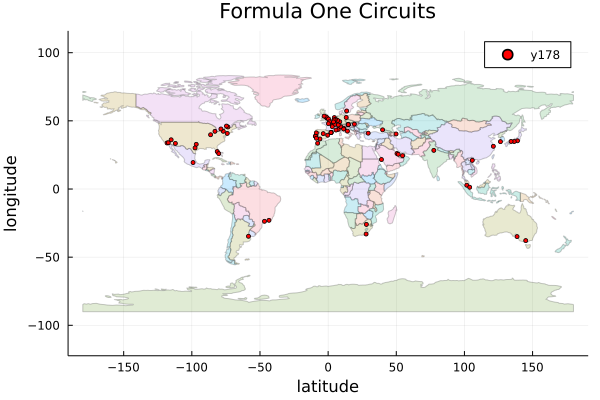

In [19]:
gr()
plot(shp_countries, alpha=0.21)
scatter!(lng, lat, ms = 3, c = "red", type="heatmap")
xlabel!("latitude")
ylabel!("longitude")
title!("Formula One Circuits")


# Drivers with more Wins

In [20]:
wins(pos) = pos == "1"
df_numWins = filter(:position => wins, df_resul)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText
,Int64,Int64,Int64,Int64,String3,Int64,String3,String3
1,1,18,1,1,22,1,1,1
2,23,19,8,6,1,2,1,1
3,45,20,13,6,2,2,1,1
4,67,21,8,6,1,1,1,1
5,89,22,13,6,2,1,1,1
6,109,23,1,1,22,3,1,1
7,129,24,9,2,4,2,1,1
8,149,25,13,6,2,2,1,1
9,169,26,1,1,22,4,1,1


In [21]:
first(df_numWins,5)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText
,Int64,Int64,Int64,Int64,String3,Int64,String3,String3
1,1,18,1,1,22,1,1,1
2,23,19,8,6,1,2,1,1
3,45,20,13,6,2,2,1,1
4,67,21,8,6,1,1,1,1
5,89,22,13,6,2,1,1,1


In [22]:
df_numWins |> names;

In [23]:
gdf = groupby(df_numWins, :driverId);

In [24]:
dfw = combine(gdf, nrow => :WinsCount);

In [25]:
df_drivers_winners = innerjoin(dfw, df_drivers, on = :driverId, makeunique=true);

In [26]:
sort!(df_drivers_winners, :WinsCount, rev=true);

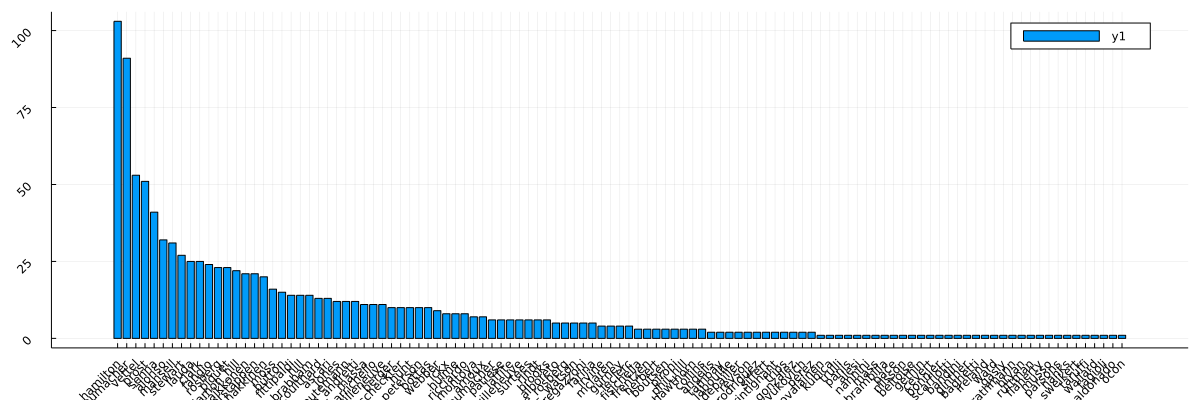

In [27]:

bar( df_drivers_winners[:,:driverRef], df_drivers_winners[:,:WinsCount], rotation=45, xticks = :all,size=(1200,400) )

Very hard to see with this long tail, so we will limit to top 25 drivers

In [28]:
df_drivers_winners25 = first(df_drivers_winners,25); #show first 25

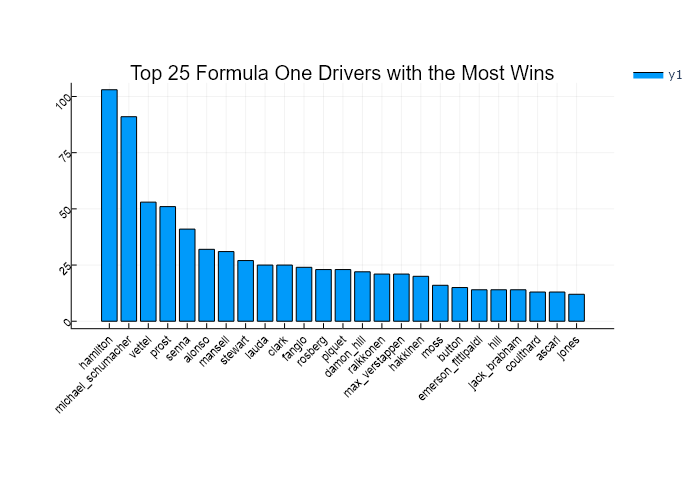

In [29]:
plotlyjs()
bar( df_drivers_winners25[:,:driverRef], df_drivers_winners25[:,:WinsCount], 
    rotation=45, xticks = :all,size=(800,400), 
    title="Top 25 Formula One Drivers with the Most Wins")

# Constructors ChampionShip by Season

In [39]:
df_numWins = filter(:year => year -> year == 2013, df_resulrac);

In [40]:
gdf = groupby(df_numWins, :constructorRef);

In [41]:
dfc = combine(gdf, :points => sum)

,constructorRef,points_sum
,String31,Float64
1,lotus_f1,315.0
2,ferrari,354.0
3,red_bull,596.0
4,mercedes,360.0
5,force_india,77.0
6,mclaren,122.0
7,toro_rosso,33.0
8,sauber,57.0
9,williams,5.0


In [42]:
sort!(dfc, :points_sum, rev=true);

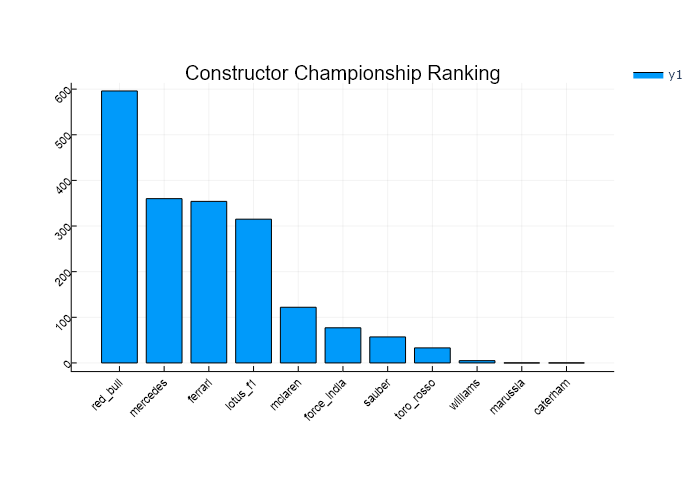

In [43]:
plotlyjs()
bar( dfc[:,:constructorRef], dfc[:,:points_sum], rotation=45, xticks = :all,size=(800,400), 
    title="Constructor Championship Ranking")

In [44]:
# wrapping the above code on a function to use later

construcRanking(y) = filter(:year => year -> year == y, df_resulrac);

In [45]:
construcRanking(2020)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText
,Int64,Int64,Int64,Int64,String3,Int64,String3,String3
1,24626,1031,822,131,77,1,1,1
2,24627,1031,844,6,16,7,2,2
3,24628,1031,846,1,4,3,3,3
4,24629,1031,1,131,44,5,4,4
5,24630,1031,832,1,55,8,5,5
6,24631,1031,815,211,11,6,6,6
7,24632,1031,842,213,10,12,7,7
8,24633,1031,839,4,31,14,8,8
9,24634,1031,841,51,99,18,9,9


# Evolution of Constructors

One thing I would like to see is the evolution of constructors over the years:

In [72]:
gdfy = groupby(df_resulrac, [:constructorRef, :year]);

In [74]:
dfcy = combine(gdfy, :points => sum)

,constructorRef,year,points_sum
,String31,Int64,Float64
1,mclaren,2008,151.0
2,bmw_sauber,2008,135.0
3,williams,2008,26.0
4,renault,2008,80.0
5,toro_rosso,2008,39.0
6,ferrari,2008,172.0
7,toyota,2008,56.0
8,super_aguri,2008,0.0
9,red_bull,2008,29.0


In [76]:
filter(:year => year -> year == 2008, dfcy)

,constructorRef,year,points_sum
,String31,Int64,Float64
1,mclaren,2008,151.0
2,bmw_sauber,2008,135.0
3,williams,2008,26.0
4,renault,2008,80.0
5,toro_rosso,2008,39.0
6,ferrari,2008,172.0
7,toyota,2008,56.0
8,super_aguri,2008,0.0
9,red_bull,2008,29.0


In [84]:
f(ref, yr) = ref == "mclaren" && yr == 2008;

In [86]:
filter([:constructorRef, :year] => f, dfcy)

,constructorRef,year,points_sum
,String31,Int64,Float64
1,mclaren,2008,151.0


In [87]:
filter([:constructorRef, :year] => f, dfcy)

,constructorRef,year,points_sum
,String31,Int64,Float64
1,mclaren,2008,151.0


In [132]:
# wrap the filter around a function so that it can be used later with diff arguments

getConstructPointsYr(constrRef, yr) = filter([:constructorRef, :year] => (x,y) -> x == constrRef && y >= yr, dfcy)

getConstructPointsYr (generic function with 1 method)

In [171]:
mc = getConstructPointsYr("mclaren", 2008); 
ferr = getConstructPointsYr("ferrari", 2008); 
williams = getConstructPointsYr("williams", 2008); 
mercedes = getConstructPointsYr("mercedes", 2008);
redbull = getConstructPointsYr("red_bull", 2008);

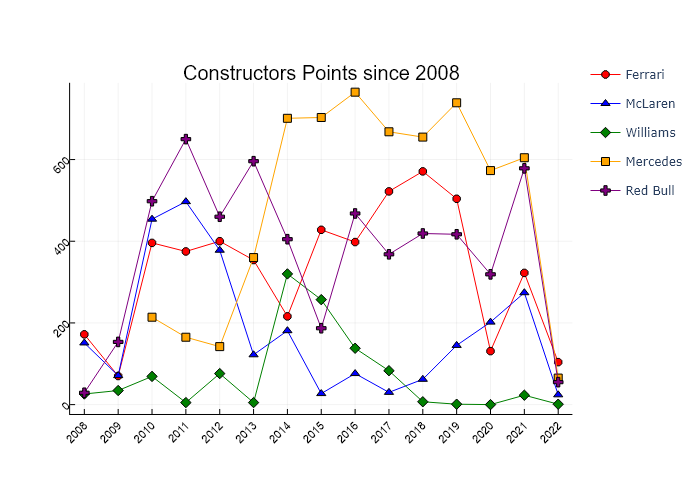

In [176]:
plot(ferr[:, :year], ferr[:, :points_sum], marker=:o, color="red", 
    title="Constructors Points since 2008", grid=true, size=(800,400),
    rotation=45, xticks = 2008:2022, legend = true, label="Ferrari")

plot!(mc[:, :year], mc[:, :points_sum], marker=:^, color="blue", label = "McLaren")

plot!(williams[:, :year], williams[:, :points_sum], marker=:diamond, color="green", label = "Williams")

plot!(mercedes[:, :year], mercedes[:, :points_sum], marker=:square, color="orange", label = "Mercedes")

plot!(redbull[:, :year], redbull[:, :points_sum], marker=:cross, color="purple", label = "Red Bull")

That is it for now. Next post we will analyse more driver and lap data.